In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# PCA

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


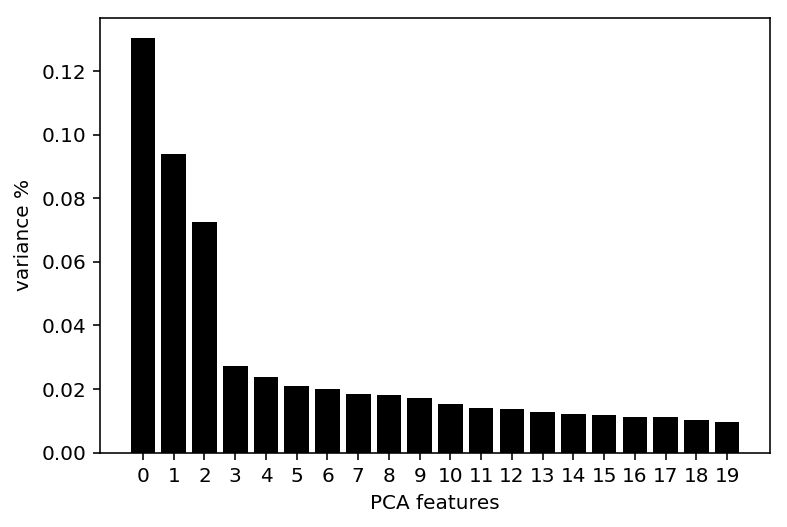

In [9]:
df = pd.read_csv('2013_2014_cleaned.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)

# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0.5,1,'Health Dataset Explained Variance')

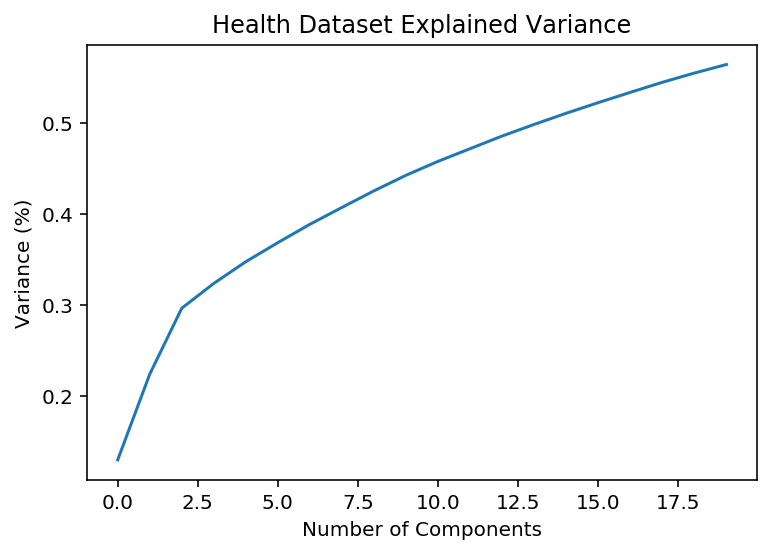

In [8]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Health Dataset Explained Variance')

Variance again drifts off at elbow

((6274, 193), (6274, 20))

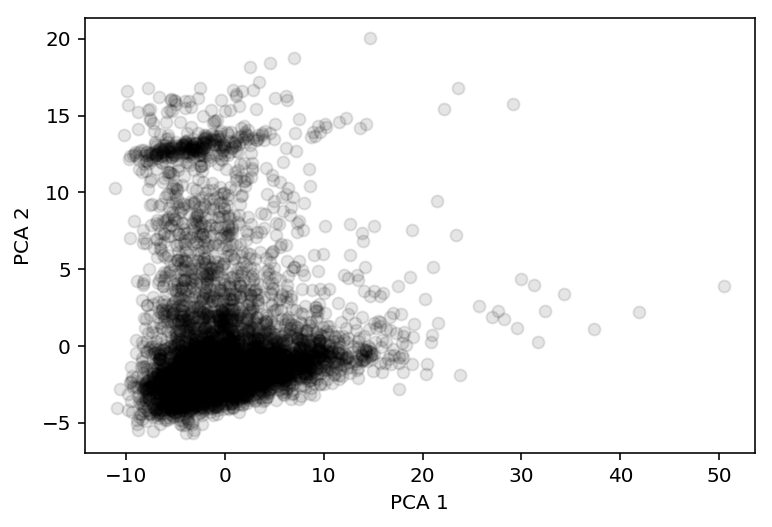

In [14]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black');
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
X_std.shape, PCA_components.shape

# K-means on PCs

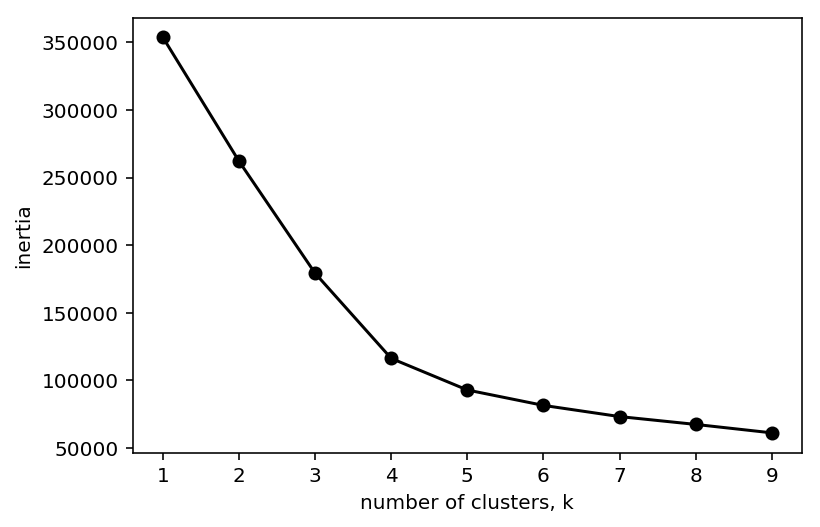

In [15]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

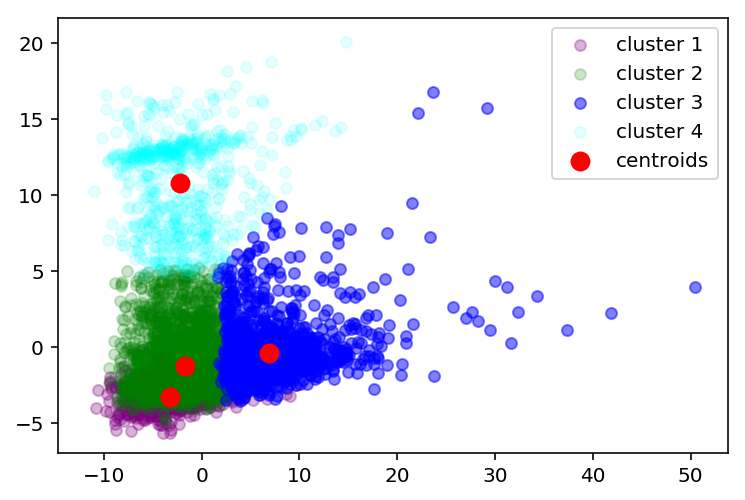

In [17]:
data = PCA_components.iloc[:,:3].values

km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,
            random_state=0)
y_km = km.fit_predict(PCA_components)

plt.scatter(data[y_km == 0, 0], data[y_km == 0, 1], s=30, c='purple', marker='o',label='cluster 1', alpha=0.3)
plt.scatter(data[y_km == 1, 0], data[y_km == 1, 1], s=30, c='green', marker='o', label='cluster 2', alpha=0.2)
plt.scatter(data[y_km == 2, 0], data[y_km == 2, 1], s=30, c='blue', label='cluster 3', alpha=0.5)
plt.scatter(data[y_km == 3, 0], data[y_km == 3, 1], s=30, c='cyan', label='cluster 4', alpha=0.1)
# plt.scatter(data[y_km == 4, 0], data[y_km == 4, 1], s=30, c='gray', label='cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=80, c='red',label='centroids')
plt.legend()
plt.show()

In [361]:
data.shape

(6274, 3)

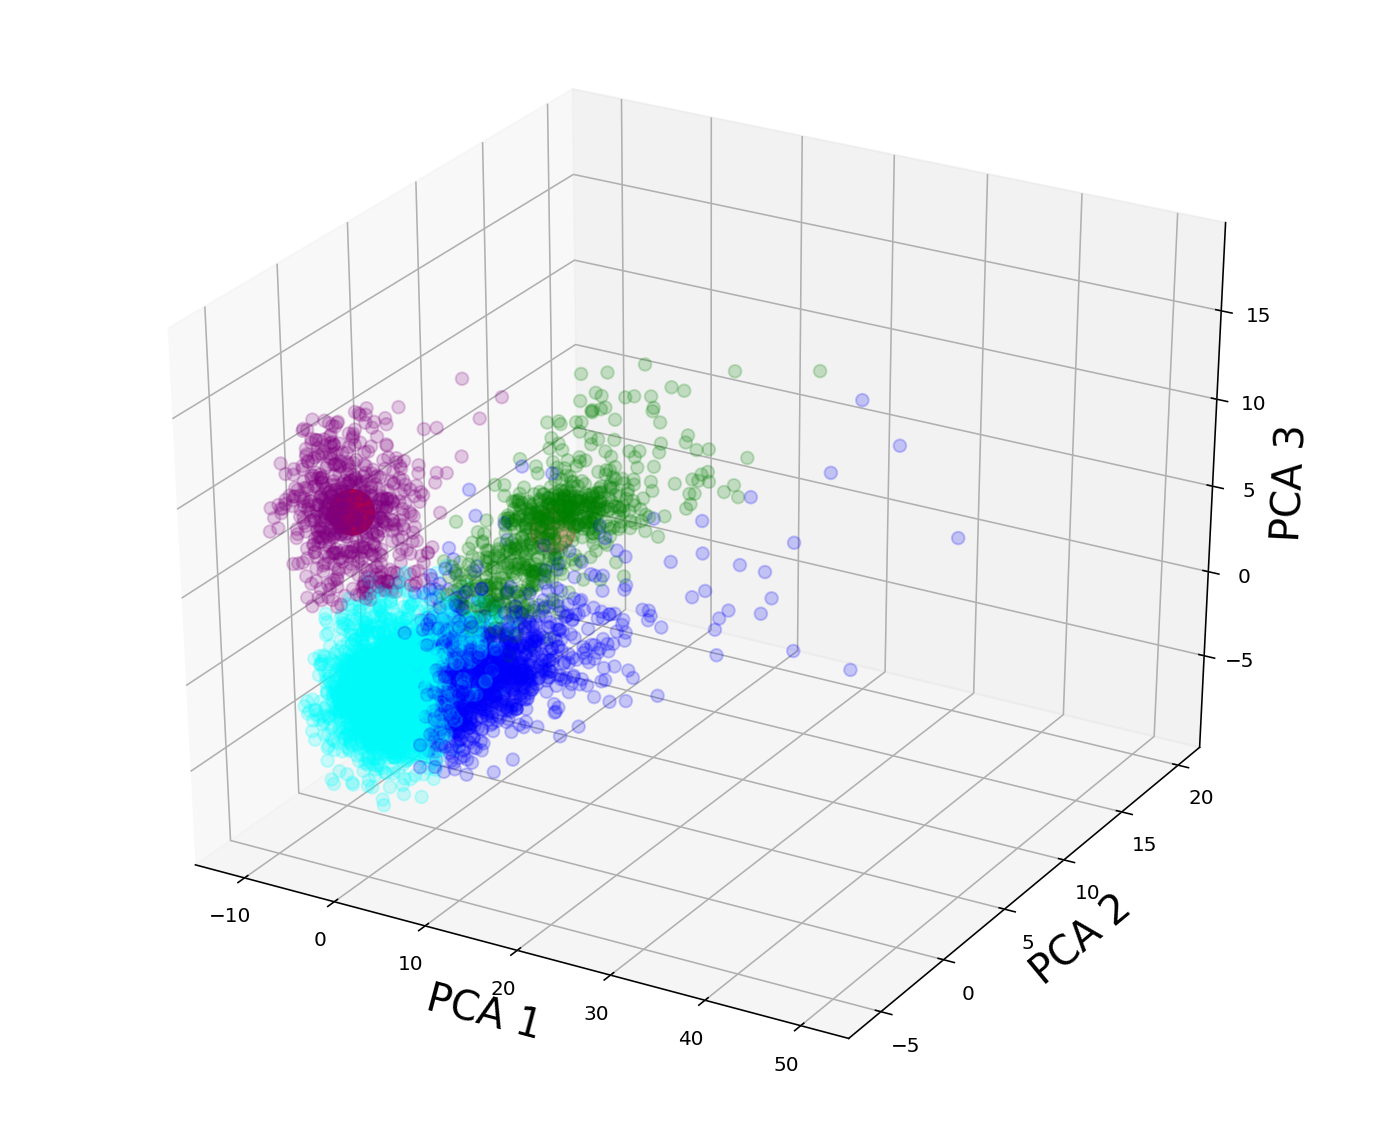

In [362]:
from mpl_toolkits.mplot3d import Axes3D

# data = data.values
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","green","blue","cyan"])

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2], 
            c=y_km, cmap=cmap,
            s=40, alpha = 0.2)


# ax.set_title("First three PCA directions")
ax.set_xlabel("PCA 1", size=20)
ax.set_ylabel("PCA 2", size=20)
ax.set_zlabel("PCA 3", size=20)
ax.dist = 10

ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           km.cluster_centers_[:,2], 
           s = 500, c = 'r', marker='o', label = 'Centroid')

plt.autoscale(enable=True, axis='x', tight=True)
# plt.xlim(-2,5)
# ax.set_zlim(-2,5)

In [364]:
data.shape

(6274, 3)

In [365]:
x, y, z = np.split(data, 3, 1)

In [381]:
import plotly.plotly as py
import plotly.graph_objs as go

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

trace = dict(
    x = x, y = y, z = z,
    type = "scatter3d",    
    mode = 'markers',
    marker = dict(size=4, color=y_km, line=dict(width=0), opacity=0.5) 
)

data=[trace]

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
#         aspectratio = dict( x=1, y=1, z=1),
        aspectmode = 'auto'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

url = py.plot(fig, filename='pandas-3d-iris', validate=False)

# Andrews curve

In [384]:
from pandas.plotting import andrews_curves

In [409]:
# df_PCA_ykm = PCA_components.copy()
df_PCA_ykm['ykm'] = y_km

In [407]:
df_PCA_ykm = df_PCA_ykm.iloc[:,:]
df_PCA_ykm.columns

Index([0, 1, 2], dtype='object')

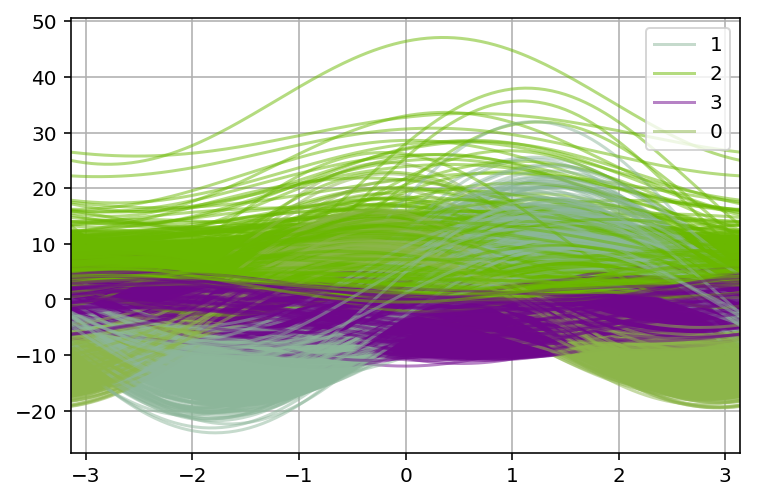

In [415]:
andrews_curves(df_PCA_ykm, 'ykm', alpha=0.5)